## Prophet Forecating Library

Implements a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

In [ ]:
pip install pyupbit

     |████████████████████████████████| 112kB 18.8MB/s 


In [ ]:
import pyupbit

# Bring Hourly data from bitcoin exchange

In [ ]:
df = pyupbit.get_ohlcv("USDT-BTC", interval="minute60", count = 17000, to = '2021-03-30')
df

,open,high,low,close,volume,value
2019-01-07 12:00:00,3985.500000,4000.000000,3977.421332,3998.516145,5.158122,20589.527434
2019-01-07 13:00:00,3993.300000,4000.000000,3986.130764,3996.487863,3.210931,12814.421090
2019-01-07 14:00:00,3994.369269,4000.000000,3980.000000,3990.845233,7.141707,28520.634790
2019-01-07 15:00:00,3990.000000,4000.000000,3985.182261,3985.182261,4.065453,16223.877354
2019-01-07 16:00:00,3985.182261,3998.986749,3982.129668,3998.000000,7.113999,28401.128513
...,...,...,...,...,...,...
2021-03-30 04:00:00,56984.090700,57954.484939,56984.089000,57629.999600,0.080085,4581.385658
2021-03-30 05:00:00,57629.999600,57659.930640,56984.089000,56984.089100,0.192015,10995.458185
2021-03-30 06:00:00,56984.089100,57463.889800,56984.089100,57316.214400,0.038463,2199.238629
2021-03-30 07:00:00,57316.214400,57463.889600,56984.087400,56984.089100,0.281079,16050.106983


In [ ]:
#Rename columns
df = df.reset_index()
df = df[["index","close"]]
df = df.rename(columns= {'index':'ds','close':'y'})
df.head()

,ds,y
0,2019-01-07 12:00:00,3998.516145
1,2019-01-07 13:00:00,3996.487863
2,2019-01-07 14:00:00,3990.845233
3,2019-01-07 15:00:00,3985.182261
4,2019-01-07 16:00:00,3998.000000


In [ ]:
splitdate = '2019-01-07'
predate = '2020-11-01'

bitcoin_train = df.loc[df.ds > splitdate]
bitcoin_train = bitcoin_train.loc[bitcoin_train.ds <= predate]
bitcoin_test = df.loc[df.ds > predate]
print(bitcoin_train.shape[0],bitcoin_train.shape[1])
print(bitcoin_test.shape[0],bitcoin_test.shape[1])

13460 2
3540 2


In [ ]:
#prophet library
from fbprophet import Prophet

In [ ]:
#train the data
model = Prophet()
model.fit(df)

In [ ]:
future = model.make_future_dataframe(periods=24, freq='H')
forecast = model.predict(future)

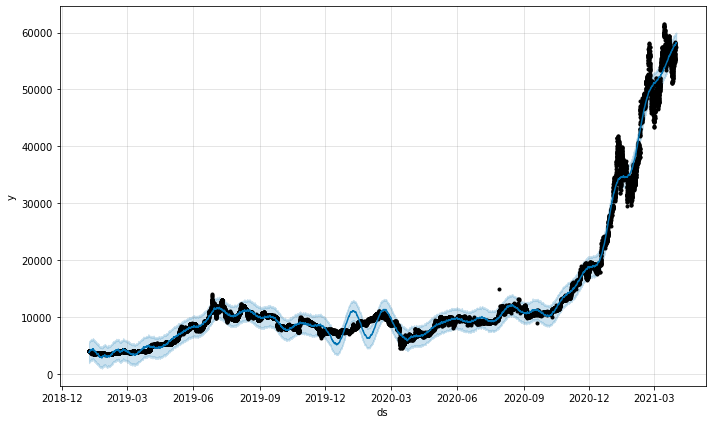

In [ ]:
#Graph1
fig1 = model.plot(forecast)

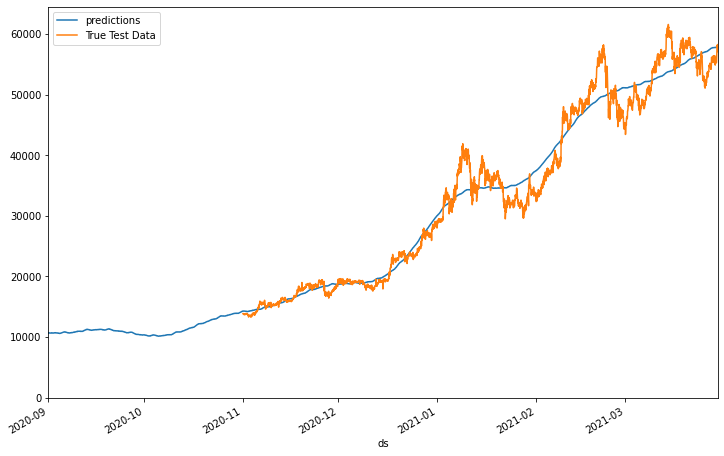

In [ ]:
ax = forecast.plot(x='ds',y='yhat',legend=True,label='predictions',figsize=(12,8))
bitcoin_test.plot(x='ds',y='y',legend=True,label='True Test Data',ax=ax,xlim=('2020-09-01','2021-03-30'))

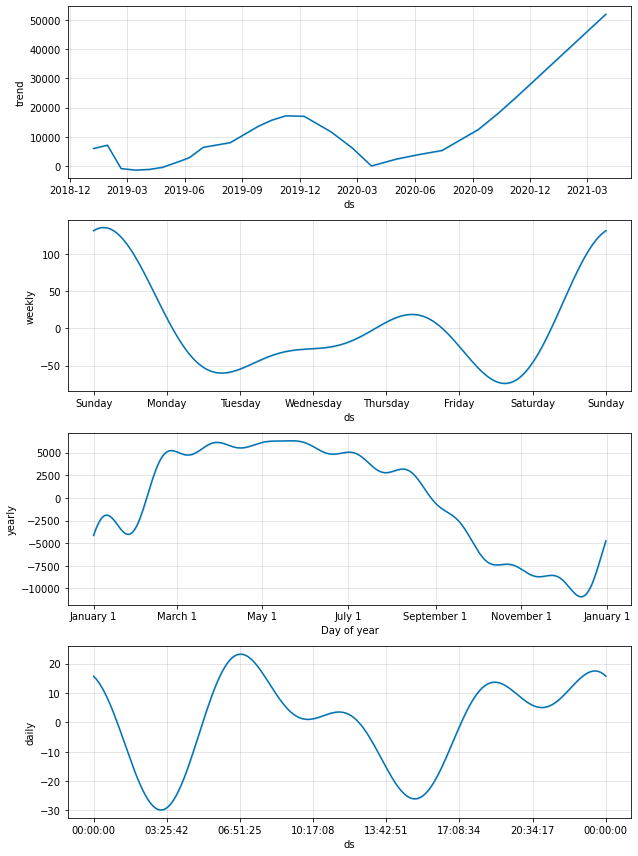

In [ ]:
#Graph 2
fig2 = model.plot_components(forecast)

In [ ]:
from fbprophet.plot import plot_plotly, plot_components_plotly
plot_plotly(model, forecast)

Output hidden; open in https://colab.research.google.com to view.

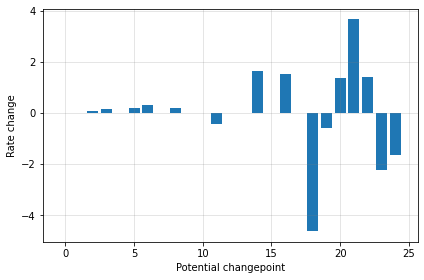

In [ ]:
import matplotlib.pylab as plt
deltas = model.params['delta'].mean(0)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111)
ax.bar(range(len(deltas)), deltas)
ax.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
ax.set_ylabel('Rate change')
ax.set_xlabel('Potential changepoint')
fig.tight_layout()

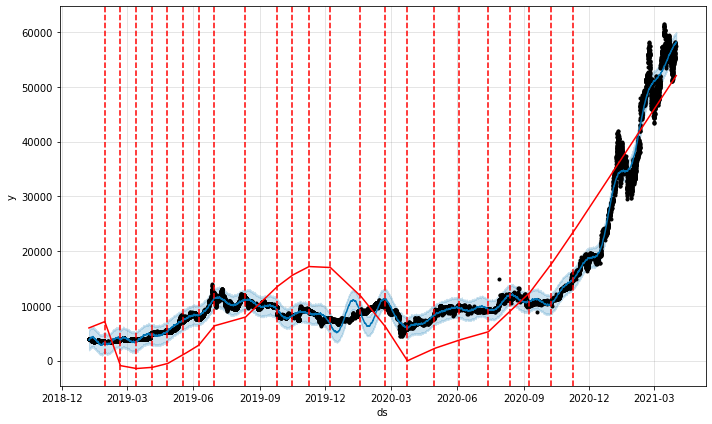

In [ ]:
from fbprophet.plot import add_changepoints_to_plot

fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

metric_df = forecast.set_index('ds')[['yhat']].join(df.set_index('ds').y).reset_index()
metric_df.dropna(inplace=True)
metric_df



print('R-Squared : ',r2_score(metric_df.y, metric_df.yhat))
print('RSE : ',mean_squared_error(metric_df.y, metric_df.yhat))
print('MAE : ',mean_absolute_error(metric_df.y, metric_df.yhat))
#print('MAPE : ',mean_absolute_percentage_error(metric_df.y, metric_df.yhat))

R-Squared :  0.988807780228211
RSE :  1871300.7152139507
MAE :  842.2408011731792


############################################################################

## Try with short term data

In [ ]:
df1 = pyupbit.get_ohlcv("USDT-BTC", interval="minute60", count = 5000, to = '2021-03-30')
df1

,open,high,low,close,volume,value
2020-08-14 18:00:00,11302.0010,11675.991000,11302.0000,11302.00100,0.271699,3094.616493
2020-08-14 19:00:00,11675.9910,11675.991000,11675.9910,11675.99100,0.031408,366.717540
2020-08-14 20:00:00,11675.9910,11675.991000,11675.9910,11675.99100,0.014103,164.665917
2020-08-14 21:00:00,11302.0010,11675.991000,11302.0010,11675.99100,0.148665,1695.263272
2020-08-14 22:00:00,11400.0010,11500.000000,11400.0000,11400.00000,0.091424,1043.789849
...,...,...,...,...,...,...
2021-03-30 04:00:00,56984.0907,57954.484939,56984.0890,57629.99960,0.080085,4581.385658
2021-03-30 05:00:00,57629.9996,57659.930640,56984.0890,56984.08910,0.192015,10995.458185
2021-03-30 06:00:00,56984.0891,57463.889800,56984.0891,57316.21440,0.038463,2199.238629
2021-03-30 07:00:00,57316.2144,57463.889600,56984.0874,56984.08910,0.281079,16050.106983


In [ ]:
#Rename columns
df1 = df1.reset_index()
df1 = df1[["index","close"]]
df1 = df1.rename(columns= {'index':'ds','close':'y'})
df1.head()

In [ ]:
splitdate = '2020-08-14'
predate = '2021-02-18'

bitcoin_train1 = df1.loc[df1.ds > splitdate]
bitcoin_train1 = bitcoin_train1.loc[bitcoin_train1.ds <= predate]
bitcoin_test1 = df1.loc[df1.ds > predate]
print(bitcoin_train1.shape[0],bitcoin_train1.shape[1])
print(bitcoin_test1.shape[0],bitcoin_test1.shape[1])

4007 3
993 3


In [ ]:
#train the data
model1 = Prophet()
model1.fit(df1)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
future1 = model1.make_future_dataframe(periods=24, freq='H')
forecast1 = model1.predict(future1)

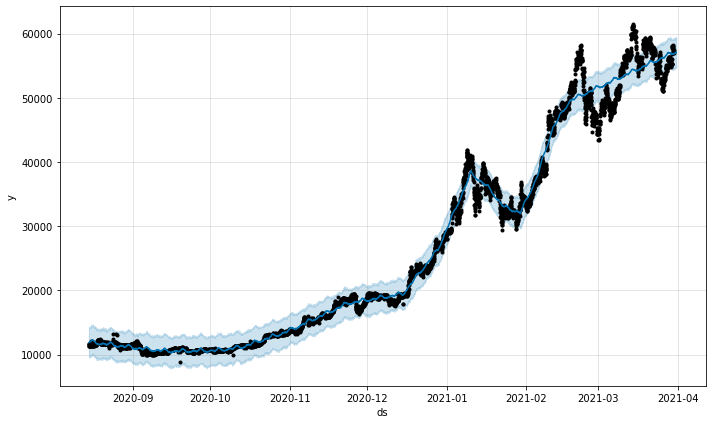

In [ ]:
fig11 = model.plot(forecast1)

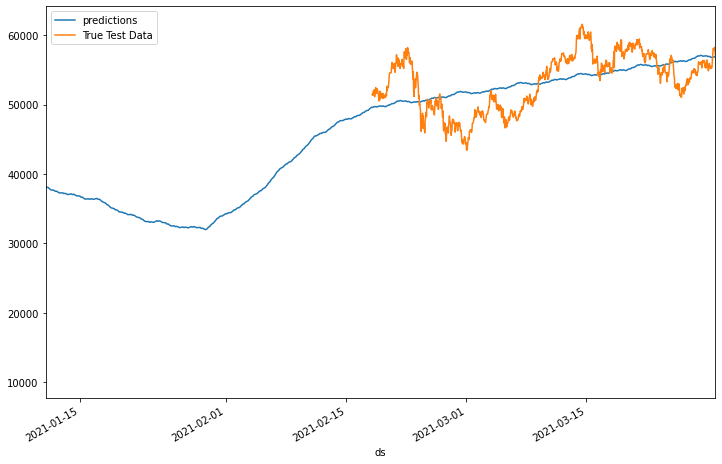

In [ ]:
ax1 = forecast1.plot(x='ds',y='yhat',legend=True,label='predictions',figsize=(12,8))
bitcoin_test1.plot(x='ds',y='y',legend=True,label='True Test Data',ax=ax1,xlim=('2021-01-11','2021-03-30'))

In [ ]:
metric_df1 = forecast1.set_index('ds')[['yhat']].join(df.set_index('ds').y).reset_index()
metric_df1.dropna(inplace=True)
metric_df1

print('R-Squared : ',r2_score(metric_df1.y, metric_df1.yhat))
print('RSE : ',mean_squared_error(metric_df1.y, metric_df1.yhat))
print('MAE : ',mean_absolute_error(metric_df1.y, metric_df1.yhat))

R-Squared :  0.9879483008752702
RSE :  3185079.155174898
MAE :  1149.1436583794475


################################################################################